In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration

In [69]:
# ,index_col='Rank'
data= pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [49]:
data.shape

(16598, 10)

In [50]:
print('Columns:\n', len(data.columns))
print('columns Name:\n', data.columns.tolist())

Columns:
 10
columns Name:
 ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [51]:
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [53]:
#show the number of null value in each column
data.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [54]:
# Show the frequency of platform
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

## Data visuaization

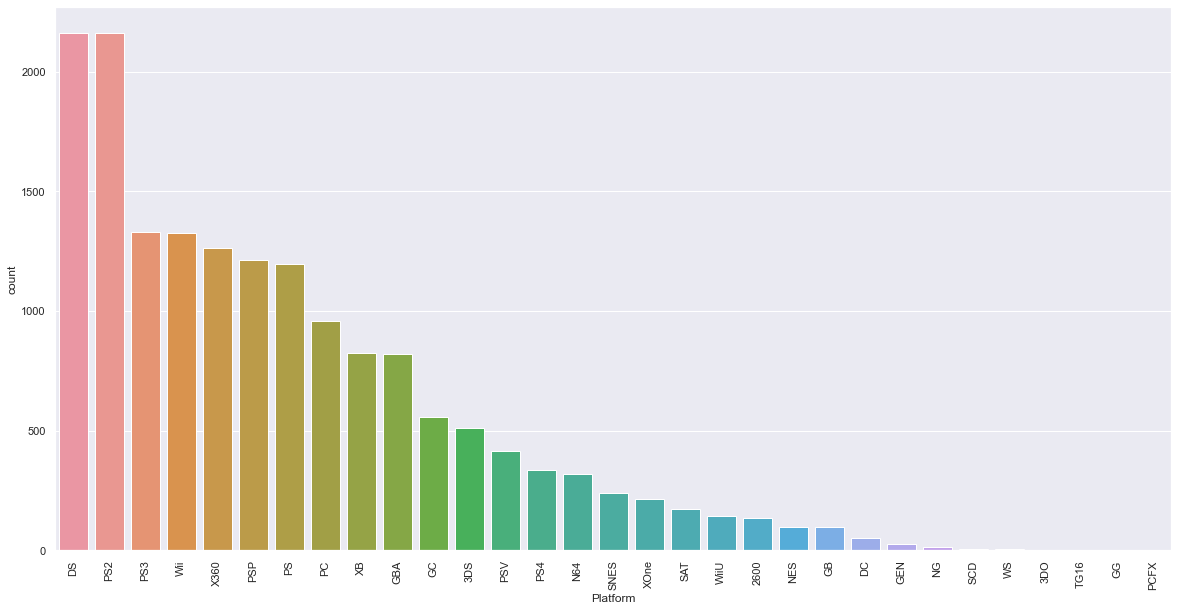

In [55]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Platform", data=data, order = data['Platform'].value_counts().index)
plt.xticks(rotation=90);

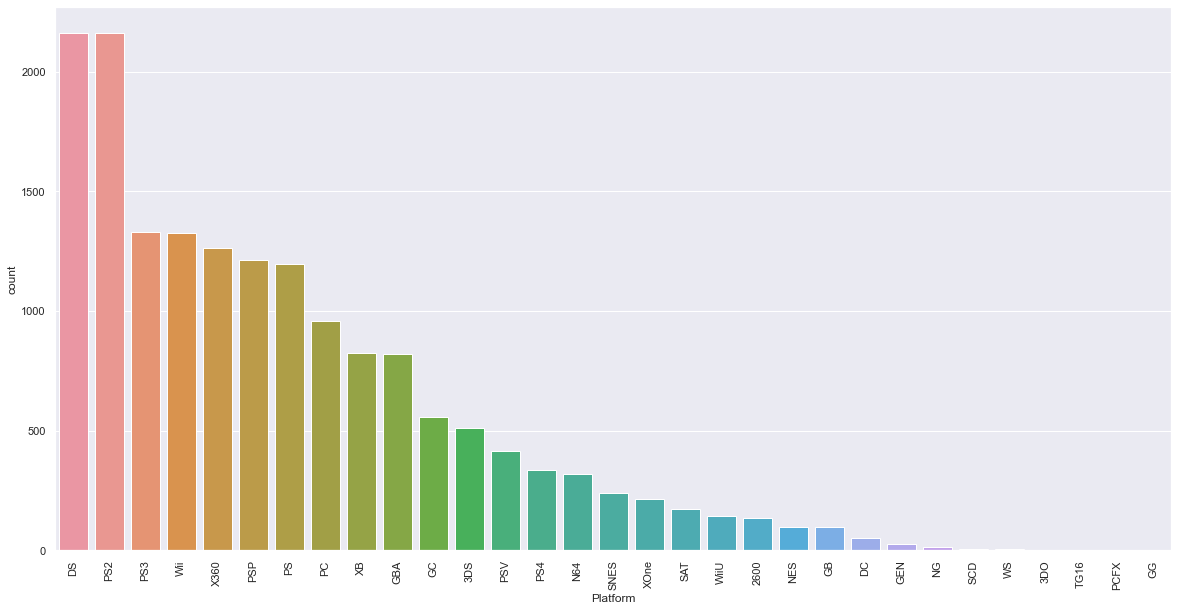

In [56]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Platform", data=data, order = data.groupby(by=['Platform'])['Global_Sales'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90);

<Figure size 1440x720 with 0 Axes>

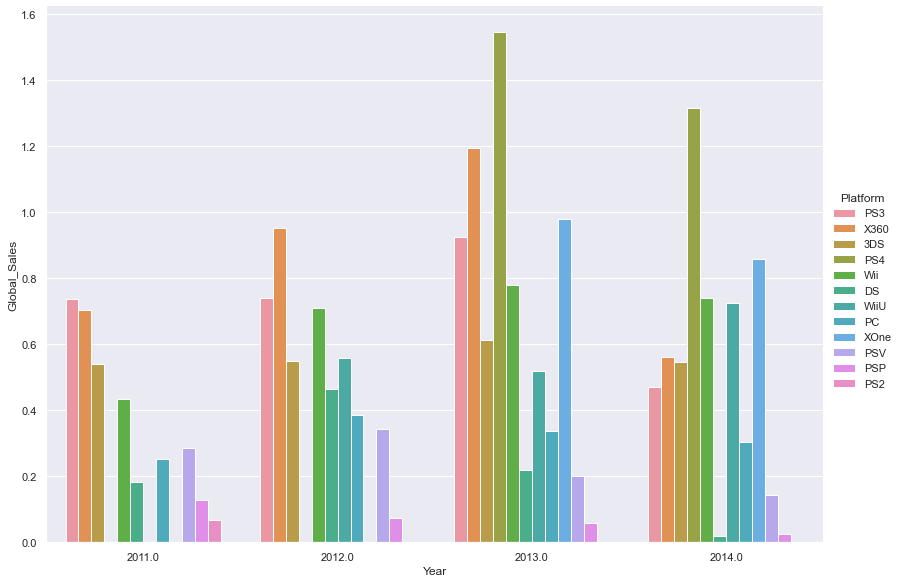

In [57]:
year_1=data.Year>2010
year_2=data.Year<2015
year_data=data[year_1 & year_2]

plt.figure(figsize=(20,10))
sns.catplot(x="Year",y="Global_Sales",kind="bar",
            hue="Platform",
            data=year_data,
            edgecolor=None,
            height=8.27, aspect=11.7/8.27,ci=None)
plt.show();

In [90]:
genr_data = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

data_genr = genr_data.groupby(by=['Genre']).sum()



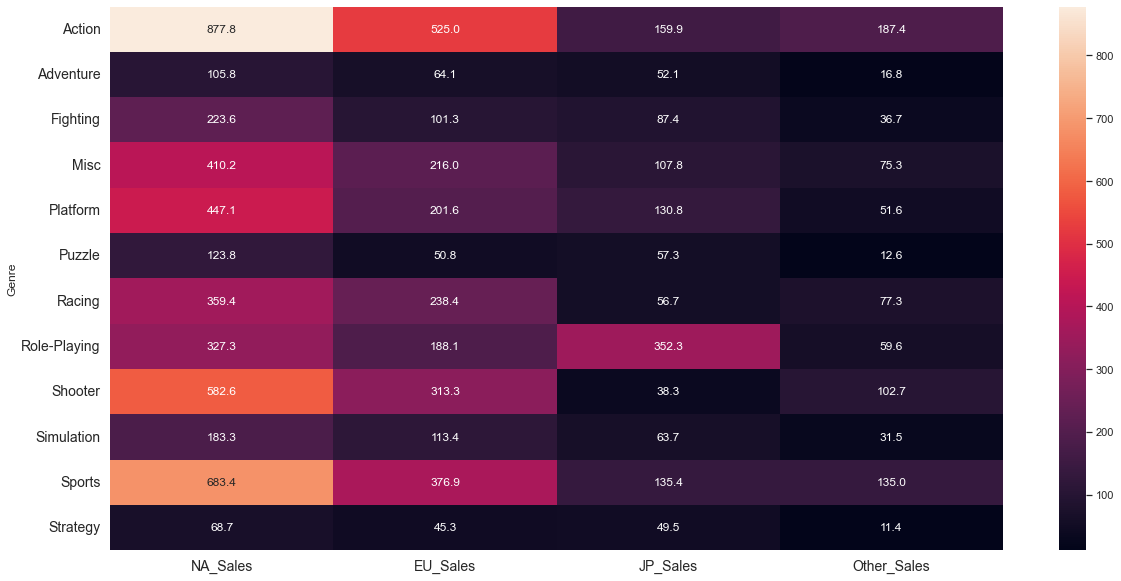

In [59]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(data_genr, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

D:\Programming\ML_Project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Programming\ML_Project\env\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


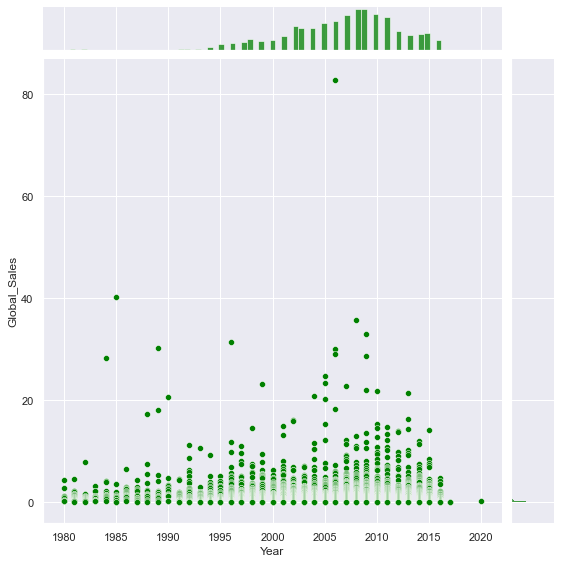

In [66]:
sns.jointplot(data.Year,data.Global_Sales,size=8, ratio=9, color="green")
plt.show()

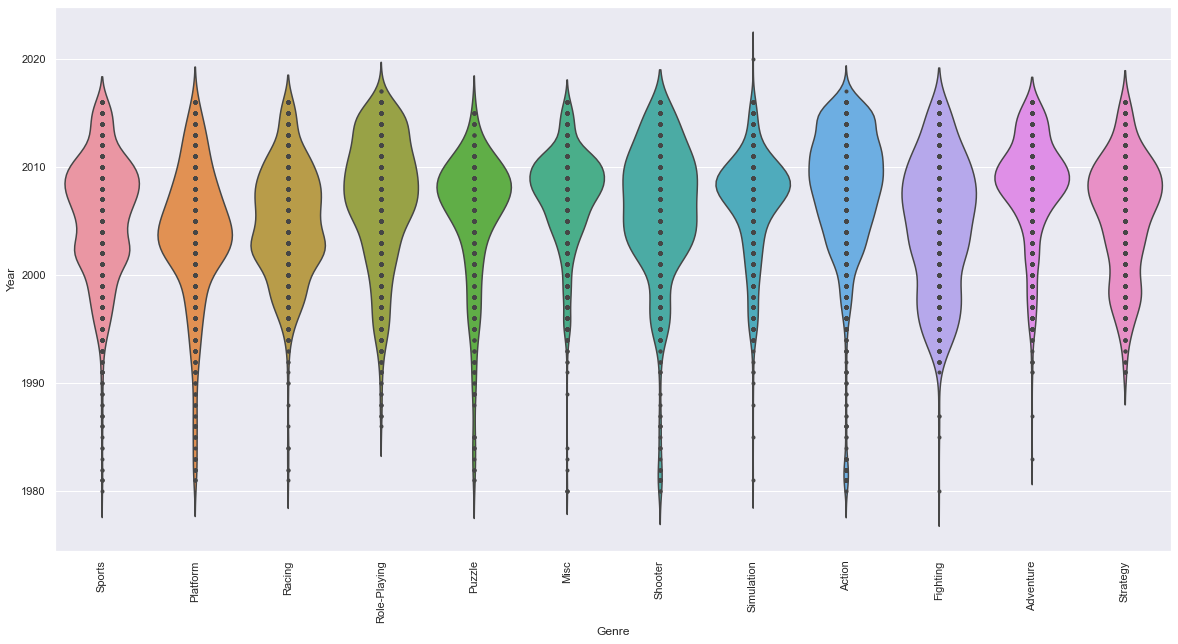

In [60]:
f,ax2=plt.subplots(figsize=(20,10))
sns.violinplot(x="Genre",y="Year", data=data, inner="points", scale="width")
plt.xticks(rotation=90)
plt.show()

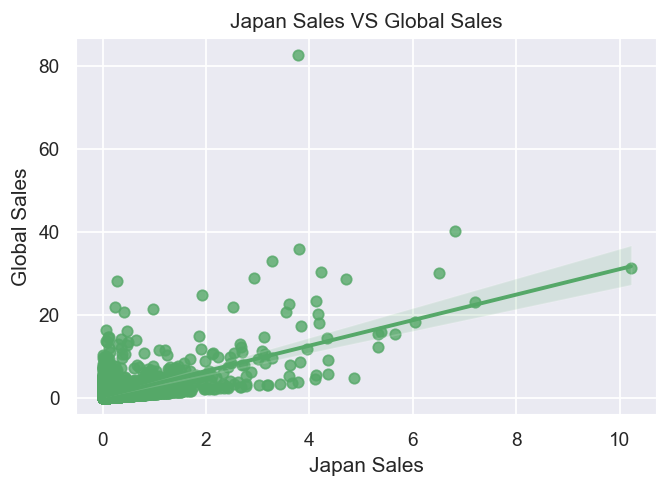

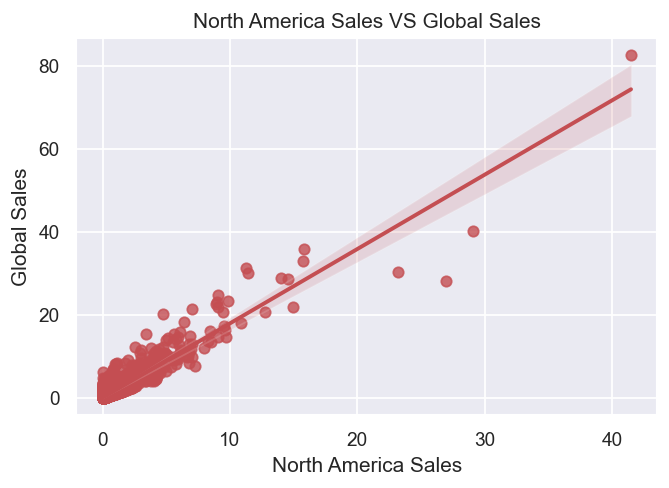

In [61]:
plt.figure(dpi=125)
sns.regplot(x=data['JP_Sales'],y=data['Global_Sales'],color="g")
plt.xlabel('Japan Sales')
plt.ylabel('Global Sales')
plt.title('Japan Sales VS Global Sales')
plt.show()


# Scatter Plot
plt.figure(dpi=125)
sns.regplot(x=data['NA_Sales'],y=data['Global_Sales'],color='r')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.title('North America Sales VS Global Sales')
plt.show()

## Linear Regression

In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [64]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Predictive Modeling with Linear Regression

In [78]:
x = data['Rank'].values
y = data['Global_Sales'].values

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.2, test_size=.1, random_state=100)

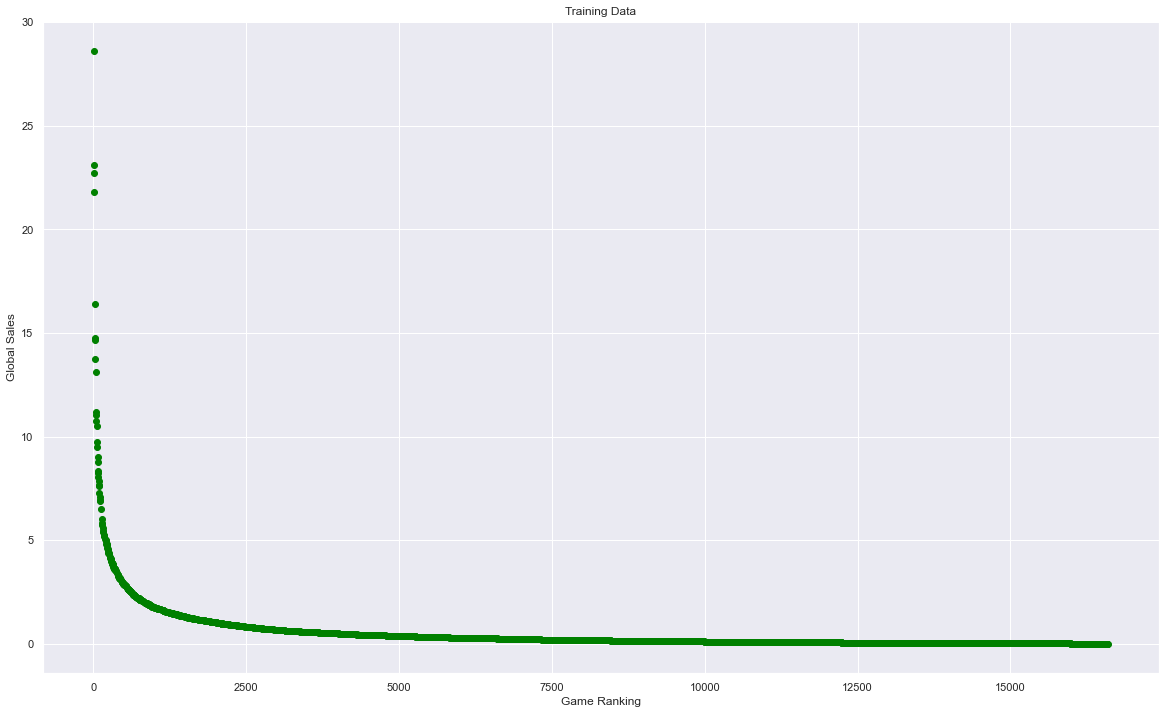

In [79]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.scatter(x_train, y_train, color='green')
plt.xlabel('Game Ranking')
plt.ylabel('Global Sales')
plt.title('Training Data')
plt.show()

In [80]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')


Train Accuracy 22.55%
Test Accuracy 18.47%


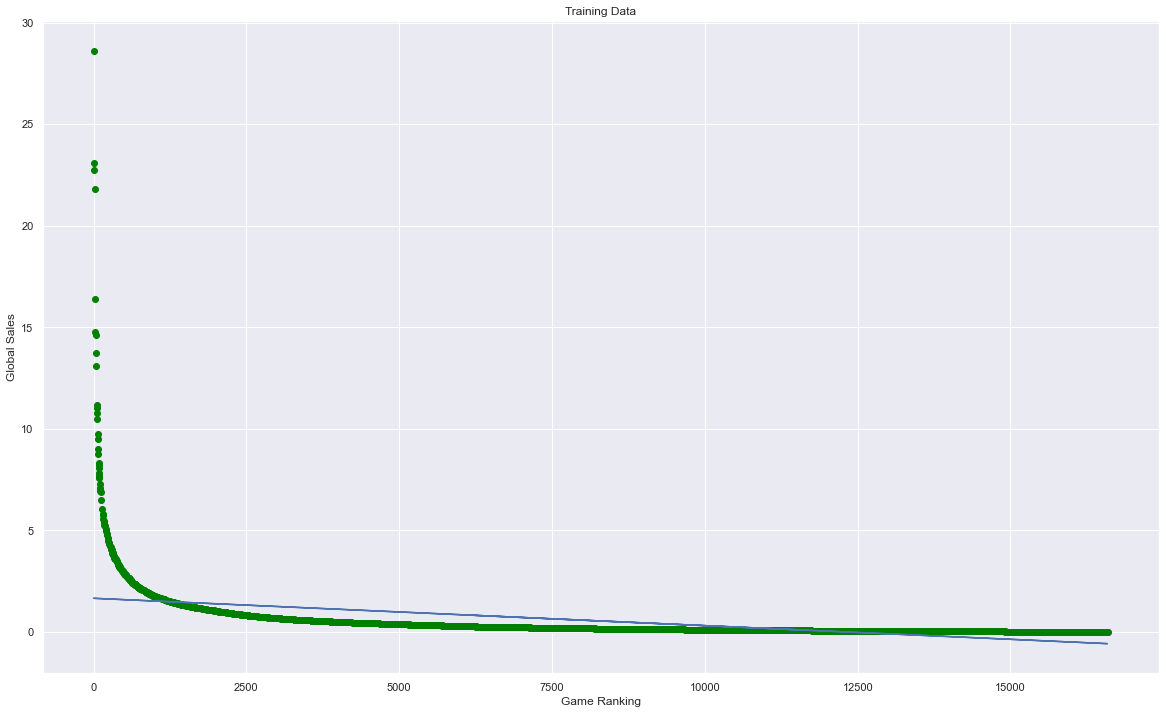

In [86]:

plt.scatter(x_train, y_train, color='green')
plt.plot(x_test, y_predict)
plt.xlabel('Game Ranking')
plt.ylabel('Global Sales')
plt.title('Training Data')
plt.show()

## Predictive Modeling with Lasso Regression

In [85]:

ls = Lasso()
l = ls.fit(x_train, y_train)
y_predict = l.predict(x_test)

print(f'Train Accuracy {round(l.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(l.score(x_test, y_test)* 100,2)}%')

Train Accuracy 22.55%
Test Accuracy 18.47%


## Summery

Because of their popularity and how much pleasure customers have with them, the highest ranking games generate the most cash. Consumers are more likely to buy the top games because they believe they are worth the money.

For future prediction:
 When games are highly rated, buyers are more likely to purchase less expensive games since they are easy on the wallet and the game has a high level of credibility.